In [273]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset from Google Drive and briefly inspect it

In [275]:
data = pd.read_csv("/content/drive/MyDrive/marketing_data.csv")

In [276]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND


In [277]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Adjust data types and fix typo in ' Income '

In [278]:
data = data.astype({'AcceptedCmp1':'bool', 'AcceptedCmp2':'bool', 'AcceptedCmp3':'bool', 'AcceptedCmp4':'bool', 'AcceptedCmp5':'bool', 'Response': 'bool', 'Complain': 'bool'})
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)
data = data.rename(columns={' Income ': 'Income'})

In [279]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Detecting NA's

In [280]:
data.isna().sum()[data.isna().sum() != 0] # Show columns that have NA's and the amount of them

Income    24
dtype: int64

In [281]:
data[data.Income.isna()] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,False,False,False,False,False,False,False,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,False,False,False,False,False,False,False,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,False,False,False,False,False,False,False,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,False,False,False,False,False,False,False,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,False,False,False,False,False,False,False,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,False,False,False,False,False,False,False,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,5,65,26,20,14,2,4,2,6,5,False,False,False,False,False,False,False,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,False,False,False,False,False,False,False,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,False,False,False,False,False,False,False,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,42,48,94,66,96,7,4,10,4,3,False,False,False,False,False,False,False,AUS


In [282]:
data.Income.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

Formatting of the column Income is needed to have it converted to float so that it can be further utilised in the analysis

In [284]:
data['Clean_Income'] = data.Income.apply(lambda x: re.sub(r'[^\d.]', '', str(x)) if pd.notna(x) else np.nan )

In [292]:
data.Clean_Income = data.Clean_Income.astype('float64')

There are 24 NA's in our dataset. It is possible to replace the NA's with averages that would be based on some other column. Let temporarely remove the NA's and use Pearson correlation coefficient to find the needed 
column.

In [293]:
data.corr()['Clean_Income']

ID                     0.013095
Year_Birth            -0.161791
Kidhome               -0.428669
Teenhome               0.019133
Recency               -0.003970
MntWines               0.578650
MntFruits              0.430842
MntMeatProducts        0.584633
MntFishProducts        0.438871
MntSweetProducts       0.440744
MntGoldProds           0.325916
NumDealsPurchases     -0.083101
NumWebPurchases        0.387878
NumCatalogPurchases    0.589162
NumStorePurchases      0.529362
NumWebVisitsMonth     -0.553088
AcceptedCmp3          -0.016174
AcceptedCmp4           0.184400
AcceptedCmp5           0.335943
AcceptedCmp1           0.276820
AcceptedCmp2           0.087545
Response               0.133047
Complain              -0.027225
Clean_Income           1.000000
Name: Clean_Income, dtype: float64

Function `detect_outliers(values)` uses IQR to detect outliers in integer and float variables

In [157]:
def detect_outliers(values: pd.Series):
  threshhold = 5

  z_scores = stats.zscore(values)
  outliers = values[np.abs(z_scores) > threshhold]

  return {"id": outliers.index, "value": outliers.values}

In [294]:
for column in data.select_dtypes(include=[np.number]):
  print(f"{column}: { (detect_outliers(data[column]))['value'].tolist() }")


ID: []
Year_Birth: [1893, 1899, 1900]
Kidhome: []
Teenhome: []
Recency: []
MntWines: []
MntFruits: []
MntMeatProducts: [1725, 1622, 1725, 1607, 1582]
MntFishProducts: []
MntSweetProducts: [262, 263]
MntGoldProds: [321, 362]
NumDealsPurchases: [12, 12, 12, 12, 15, 15, 15, 15, 15, 13, 13, 15, 13, 15]
NumWebPurchases: [25, 27, 27, 23]
NumCatalogPurchases: [28, 28, 28, 22]
NumStorePurchases: []
NumWebVisitsMonth: [19, 19, 20, 20, 20]
Clean_Income: []


Let's check out some variables that have outliers!

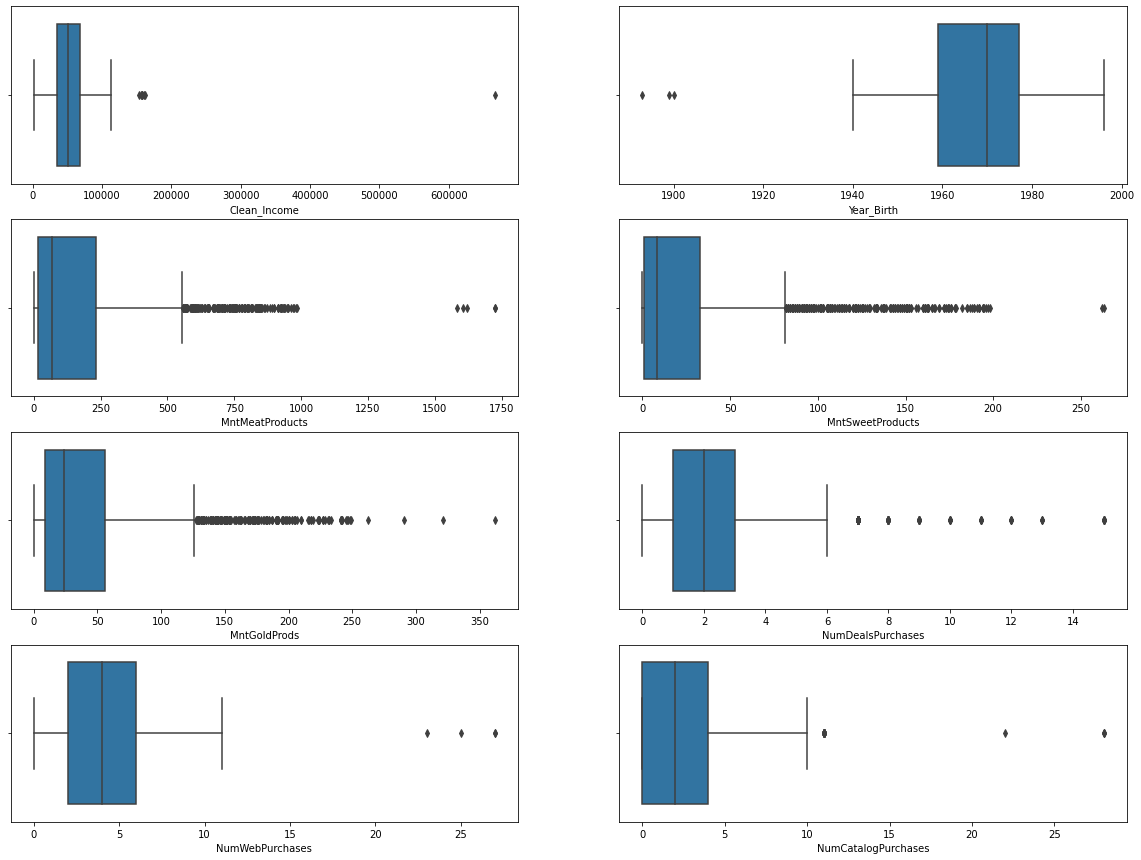

In [297]:
fig, (ax) = plt.subplots(4,2) 
fig.set_size_inches(20, 15)
sns.boxplot(x=data.Clean_Income, ax=ax[0, 0])
sns.boxplot(x=data.Year_Birth, ax=ax[0, 1])
sns.boxplot(x=data.MntMeatProducts, ax=ax[1,0])
sns.boxplot(x=data.MntSweetProducts, ax=ax[1,1])
sns.boxplot(x=data.MntGoldProds, ax=ax[2,0])
sns.boxplot(x=data.NumDealsPurchases, ax=ax[2,1])
sns.boxplot(x=data.NumWebPurchases, ax=ax[3,0])
sns.boxplot(x=data.NumCatalogPurchases, ax=ax[3,1])

plt.show()